## first RNN  on time series 

# rnn example for sine wave 

In [83]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

In [84]:
x=np.linspace(0,50,500)
y=np.sin(x)

In [85]:
y

array([ 0.        ,  0.10003281,  0.19906213,  0.2960945 ,  0.39015654,
        0.48030464,  0.56563445,  0.64528998,  0.71847213,  0.78444678,
        0.84255206,  0.89220511,  0.93290779,  0.96425181,  0.98592271,
        0.99770312,  0.99947484,  0.99122011,  0.97302173,  0.94506227,
        0.9076222 ,  0.86107713,  0.80589396,  0.74262629,  0.6719088 ,
        0.5944509 ,  0.51102964,  0.42248187,  0.32969589,  0.23360248,
        0.13516563,  0.03537285, -0.06477479, -0.16427262, -0.26212252,
       -0.35734288, -0.44897847, -0.53611004, -0.61786349, -0.69341871,
       -0.76201775, -0.82297244, -0.8756713 , -0.91958566, -0.95427499,
       -0.97939131, -0.99468264, -0.99999559, -0.99527686, -0.98057379,
       -0.95603388, -0.9219033 , -0.87852444, -0.82633246, -0.76585095,
       -0.69768664, -0.62252332, -0.54111503, -0.45427842, -0.36288461,
       -0.26785044, -0.17012928, -0.07070142,  0.02943569,  0.12927751,
        0.22782246,  0.32408195,  0.41709035,  0.50591461,  0.58

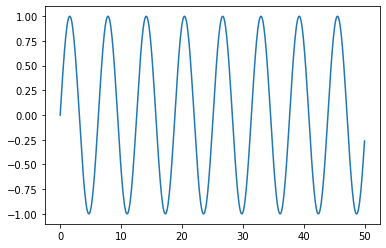

In [86]:
plt.plot(x,y)

# lets turn this into a dataframe 

In [87]:
df=pd.DataFrame(data=y , index=x , columns =['Sine'])

In [88]:
df

,Sine
0.000000,0.000000
0.100200,0.100033
0.200401,0.199062
0.300601,0.296095
0.400802,0.390157
...,...
49.599198,-0.618069
49.699399,-0.536331
49.799599,-0.449212
49.899800,-0.357587


# train test split 

In [89]:
len(df)

500

In [90]:
test_percent =0.1

In [91]:
len(df) * test_percent

50.0

In [92]:
test_point = np.round(len(df)* test_percent)

In [93]:
test_ind = int(len(df) - test_point)

In [94]:
test_ind

450

In [95]:
train = df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [96]:
train, test 

(               Sine
 0.000000   0.000000
 0.100200   0.100033
 0.200401   0.199062
 0.300601   0.296095
 0.400802   0.390157
 ...             ...
 44.589178  0.570308
 44.689379  0.649618
 44.789579  0.722410
 44.889780  0.787956
 44.989980  0.845597
 
 [450 rows x 1 columns],
                Sine
 45.090180  0.894755
 45.190381  0.934938
 45.290581  0.965741
 45.390782  0.986856
 45.490982  0.998072
 45.591182  0.999275
 45.691383  0.990453
 45.791583  0.971696
 45.891784  0.943191
 45.991984  0.905224
 46.092184  0.858176
 46.192385  0.802519
 46.292585  0.738811
 46.392786  0.667692
 46.492986  0.589875
 46.593186  0.506140
 46.693387  0.417328
 46.793587  0.324329
 46.893788  0.228077
 46.993988  0.129537
 47.094188  0.029697
 47.194389 -0.070441
 47.294589 -0.169872
 47.394790 -0.267599
 47.494990 -0.362641
 47.595190 -0.454045
 47.695391 -0.540895
 47.795591 -0.622319
 47.895792 -0.697499
 47.995992 -0.765683
 48.096192 -0.826185
 48.196393 -0.878399
 48.296593 -0.921802
 48.396

# scale data 

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler=MinMaxScaler()

In [99]:
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [100]:
scaled_train = scaler.transform(train)
scaled_test =scaler.transform(test)

# time series generator 

In [101]:
#This class takes in a sequence of data-points gathered at equal intervals, along with time series parameters
#such as stride, length of history, etc., to produce batches for training/validation.

In [102]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [103]:
# scaled train 

In [104]:
length = 2# Length of the output sequences (in number of timesteps)
batch_size=1#Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [105]:
len(scaled_train)

450

In [106]:
len(generator) , type(generator)

(448, tensorflow.python.keras.preprocessing.sequence.TimeseriesGenerator)

In [107]:
generator [0]

(array([[[0.50000825],
         [0.5500257 ]]]),
 array([[0.59954139]]))

# what does a  first batch look like?

In [108]:
X ,y = generator[0]

In [109]:
print(f'Given the array : \n {X.flatten()}')
print(f'Predict the  y : \n {y}')

Given the array : 
 [0.50000825 0.5500257 ]
Predict the  y : 
 [[0.59954139]]


In [110]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [111]:
# What does the first batch look like?
X,y = generator[0]

In [112]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.50000825 0.5500257  0.59954139 0.6480586  0.6950906  0.74016559
 0.78283139 0.82265998 0.85925183 0.89223984]
Predict this y: 
 [[0.92129309]]


In [113]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [114]:
print(generator[0])

(array([[[0.50000825],
        [0.5500257 ],
        [0.59954139],
        [0.6480586 ],
        [0.6950906 ],
        [0.74016559],
        [0.78283139],
        [0.82265998],
        [0.85925183],
        [0.89223984],
        [0.92129309],
        [0.94612013],
        [0.9664719 ],
        [0.98214423],
        [0.99297991],
        [0.99887024],
        [0.99975612],
        [0.99562866],
        [0.98652928],
        [0.97254926],
        [0.95382884],
        [0.93055581],
        [0.90296365],
        [0.87132916],
        [0.83596967],
        [0.79723991],
        [0.75552841],
        [0.7112536 ],
        [0.66485964],
        [0.61681193],
        [0.56759248],
        [0.51769504],
        [0.46762018],
        [0.41787022],
        [0.36894425],
        [0.32133307],
        [0.27551432],
        [0.23194763],
        [0.19107004],
        [0.15329164],
        [0.11899141],
        [0.08851343],
        [0.06216345],
        [0.04020581],
        [0.02286078],
        [

# create the model

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,  LSTM  , SimpleRNN

In [116]:
#we are using one feature only 
n_features=1

In [117]:
length , n_features

(50, 1)

In [118]:
# define model 
model = Sequential()
# simple rnn layer 
model.add(SimpleRNN(50,input_shape=(length , n_features)))


# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [119]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [120]:
# fit model 
model.fit_generator(generator, epochs=5)

  ...
    to  
  ['...']
Train for 400 steps
Epoch 1/5
400/400 [==============================] - 10s 26ms/step - loss: 8.3073e-04
Epoch 2/5
400/400 [==============================] - 9s 24ms/step - loss: 3.4734e-04
Epoch 3/5
400/400 [==============================] - 10s 24ms/step - loss: 5.0027e-05
Epoch 4/5
400/400 [==============================] - 10s 24ms/step - loss: 5.4075e-04
Epoch 5/5
400/400 [==============================] - 11s 27ms/step - loss: 1.5298e-05


In [121]:
model.history.history

{'loss': [0.0008307300087358254,
  0.00034733989334081284,
  5.002660402434689e-05,
  0.0005407510691475847,
  1.5297856183180725e-05]}

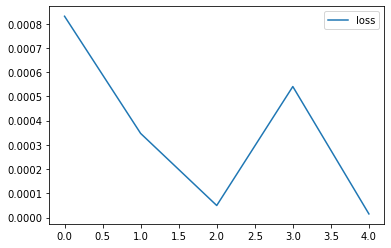

In [122]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# evaluate on test data

In [123]:
first_eval_batch_id =scaled_train[-length:]

In [124]:
first_eval_batch_id

array([[8.44673344e-01],
       [8.06708858e-01],
       [7.65667635e-01],
       [7.21961392e-01],
       [6.76028576e-01],
       [6.28329973e-01],
       [5.79344082e-01],
       [5.29562316e-01],
       [4.79484071e-01],
       [4.29611720e-01],
       [3.80445567e-01],
       [3.32478833e-01],
       [2.86192709e-01],
       [2.42051522e-01],
       [2.00498086e-01],
       [1.61949253e-01],
       [1.26791734e-01],
       [9.53782193e-02],
       [6.80238411e-02],
       [4.50030107e-02],
       [2.65466667e-02],
       [1.28399581e-02],
       [4.02038667e-03],
       [1.76428007e-04],
       [1.34664361e-03],
       [7.51929419e-03],
       [1.86324574e-02],
       [3.45746492e-02],
       [5.51859418e-02],
       [8.02595684e-02],
       [1.09543997e-01],
       [1.42745456e-01],
       [1.79530875e-01],
       [2.19531235e-01],
       [2.62345262e-01],
       [3.07543459e-01],
       [3.54672408e-01],
       [4.03259327e-01],
       [4.52816804e-01],
       [5.02847693e-01],


In [125]:
len(first_eval_batch_id) , type ( first_eval_batch_id)

(50, numpy.ndarray)

In [126]:
first_eval_batch = first_eval_batch_id[-50:]

## essentially , we need to take the ast 25 points  of our traning set  to predict one point into the future , 
# which is the very first point  in our test set

In [127]:
## essentially , we need to take the ast 25 points  of our traning set  to predict one point into the future , 
#which is the very first point  in our test set 
first_eval_batch

array([[8.44673344e-01],
       [8.06708858e-01],
       [7.65667635e-01],
       [7.21961392e-01],
       [6.76028576e-01],
       [6.28329973e-01],
       [5.79344082e-01],
       [5.29562316e-01],
       [4.79484071e-01],
       [4.29611720e-01],
       [3.80445567e-01],
       [3.32478833e-01],
       [2.86192709e-01],
       [2.42051522e-01],
       [2.00498086e-01],
       [1.61949253e-01],
       [1.26791734e-01],
       [9.53782193e-02],
       [6.80238411e-02],
       [4.50030107e-02],
       [2.65466667e-02],
       [1.28399581e-02],
       [4.02038667e-03],
       [1.76428007e-04],
       [1.34664361e-03],
       [7.51929419e-03],
       [1.86324574e-02],
       [3.45746492e-02],
       [5.51859418e-02],
       [8.02595684e-02],
       [1.09543997e-01],
       [1.42745456e-01],
       [1.79530875e-01],
       [2.19531235e-01],
       [2.62345262e-01],
       [3.07543459e-01],
       [3.54672408e-01],
       [4.03259327e-01],
       [4.52816804e-01],
       [5.02847693e-01],


# in order to pass this into the model , we need to reshape this 

In [128]:
first_eval_batch.shape

(50, 1)

In [129]:
first_eval_batch =  first_eval_batch.reshape(1,50,  n_features)

In [130]:
model.predict(first_eval_batch)

array([[0.9471409]], dtype=float32)

## hence the first predicted value  is 0.948 

In [131]:
scaled_test[0]

array([0.94739531])

# Now let's put this logic in a for loop to predict into the future for the entire test range. 

In [132]:
length , n_features

(50, 1)

In [133]:
test_predictions=[]

first_eval_batch = scaled_train[-length:]
curent_batch =  first_eval_batch.reshape(1, length ,  n_features )

In [134]:
first_eval_batch

array([[8.44673344e-01],
       [8.06708858e-01],
       [7.65667635e-01],
       [7.21961392e-01],
       [6.76028576e-01],
       [6.28329973e-01],
       [5.79344082e-01],
       [5.29562316e-01],
       [4.79484071e-01],
       [4.29611720e-01],
       [3.80445567e-01],
       [3.32478833e-01],
       [2.86192709e-01],
       [2.42051522e-01],
       [2.00498086e-01],
       [1.61949253e-01],
       [1.26791734e-01],
       [9.53782193e-02],
       [6.80238411e-02],
       [4.50030107e-02],
       [2.65466667e-02],
       [1.28399581e-02],
       [4.02038667e-03],
       [1.76428007e-04],
       [1.34664361e-03],
       [7.51929419e-03],
       [1.86324574e-02],
       [3.45746492e-02],
       [5.51859418e-02],
       [8.02595684e-02],
       [1.09543997e-01],
       [1.42745456e-01],
       [1.79530875e-01],
       [2.19531235e-01],
       [2.62345262e-01],
       [3.07543459e-01],
       [3.54672408e-01],
       [4.03259327e-01],
       [4.52816804e-01],
       [5.02847693e-01],


In [135]:
curent_batch

array([[[8.44673344e-01],
        [8.06708858e-01],
        [7.65667635e-01],
        [7.21961392e-01],
        [6.76028576e-01],
        [6.28329973e-01],
        [5.79344082e-01],
        [5.29562316e-01],
        [4.79484071e-01],
        [4.29611720e-01],
        [3.80445567e-01],
        [3.32478833e-01],
        [2.86192709e-01],
        [2.42051522e-01],
        [2.00498086e-01],
        [1.61949253e-01],
        [1.26791734e-01],
        [9.53782193e-02],
        [6.80238411e-02],
        [4.50030107e-02],
        [2.65466667e-02],
        [1.28399581e-02],
        [4.02038667e-03],
        [1.76428007e-04],
        [1.34664361e-03],
        [7.51929419e-03],
        [1.86324574e-02],
        [3.45746492e-02],
        [5.51859418e-02],
        [8.02595684e-02],
        [1.09543997e-01],
        [1.42745456e-01],
        [1.79530875e-01],
        [2.19531235e-01],
        [2.62345262e-01],
        [3.07543459e-01],
        [3.54672408e-01],
        [4.03259327e-01],
        [4.5

In [136]:
curent_batch.shape

(1, 50, 1)

In [137]:
## printing second element 

curent_batch[:,1].shape , curent_batch[:,1]

((1, 1), array([[0.80670886]]))

In [138]:
curent_batch[:,1:,:].shape

(1, 49, 1)

In [139]:
test_check=np.append(curent_batch[:,1:,:],[[[99]]],axis=1)

In [140]:
test_check

array([[[8.06708858e-01],
        [7.65667635e-01],
        [7.21961392e-01],
        [6.76028576e-01],
        [6.28329973e-01],
        [5.79344082e-01],
        [5.29562316e-01],
        [4.79484071e-01],
        [4.29611720e-01],
        [3.80445567e-01],
        [3.32478833e-01],
        [2.86192709e-01],
        [2.42051522e-01],
        [2.00498086e-01],
        [1.61949253e-01],
        [1.26791734e-01],
        [9.53782193e-02],
        [6.80238411e-02],
        [4.50030107e-02],
        [2.65466667e-02],
        [1.28399581e-02],
        [4.02038667e-03],
        [1.76428007e-04],
        [1.34664361e-03],
        [7.51929419e-03],
        [1.86324574e-02],
        [3.45746492e-02],
        [5.51859418e-02],
        [8.02595684e-02],
        [1.09543997e-01],
        [1.42745456e-01],
        [1.79530875e-01],
        [2.19531235e-01],
        [2.62345262e-01],
        [3.07543459e-01],
        [3.54672408e-01],
        [4.03259327e-01],
        [4.52816804e-01],
        [5.0

# hence curent_batch[:,1:,:]  cuts out the first element of the above element 

In [141]:
test_predictions =[]

first_eval_batch =scaled_train[-length:]
current_batch =  first_eval_batch.reshape((1 , 50 , 1))
#current_batch.shape
#print(current_batch[0])
for i in range(len(test)):
    # get prediction  1 time stamp  ahead   ([0] for  grabbing  just the number  instead of array )
    current_pred=  model.predict(current_batch)[0]
    #print(current_pred)
    
    test_predictions.append(current_pred)
    ##move my current batch forward by 1 timestamp 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    
    #print(f"  current batch id  is {current_batch}")

In [142]:
test_predictions

[array([0.9471409], dtype=float32),
 array([0.9666665], dtype=float32),
 array([0.98111296], dtype=float32),
 array([0.9902556], dtype=float32),
 array([0.9940646], dtype=float32),
 array([0.9925444], dtype=float32),
 array([0.9857975], dtype=float32),
 array([0.9740332], dtype=float32),
 array([0.95752466], dtype=float32),
 array([0.93656486], dtype=float32),
 array([0.9114754], dtype=float32),
 array([0.882617], dtype=float32),
 array([0.8503167], dtype=float32),
 array([0.8149056], dtype=float32),
 array([0.7767167], dtype=float32),
 array([0.7360465], dtype=float32),
 array([0.6931991], dtype=float32),
 array([0.64847684], dtype=float32),
 array([0.6021655], dtype=float32),
 array([0.5545797], dtype=float32),
 array([0.5060478], dtype=float32),
 array([0.45692945], dtype=float32),
 array([0.40762708], dtype=float32),
 array([0.35859078], dtype=float32),
 array([0.31031352], dtype=float32),
 array([0.26333025], dtype=float32),
 array([0.21822801], dtype=float32),
 array([0.17559813]

In [143]:
scaled_test

array([[ 9.47395314e-01],
       [ 9.67486902e-01],
       [ 9.82888874e-01],
       [ 9.93446722e-01],
       [ 9.99054531e-01],
       [ 9.99656047e-01],
       [ 9.95245234e-01],
       [ 9.85866341e-01],
       [ 9.71613455e-01],
       [ 9.52629556e-01],
       [ 9.29105085e-01],
       [ 9.01276034e-01],
       [ 8.69421575e-01],
       [ 8.33861265e-01],
       [ 7.94951833e-01],
       [ 7.53083610e-01],
       [ 7.08676604e-01],
       [ 6.62176295e-01],
       [ 6.14049162e-01],
       [ 5.64778001e-01],
       [ 5.14857089e-01],
       [ 4.64787216e-01],
       [ 4.15070672e-01],
       [ 3.66206198e-01],
       [ 3.18683988e-01],
       [ 2.72980774e-01],
       [ 2.29555036e-01],
       [ 1.88842410e-01],
       [ 1.51251313e-01],
       [ 1.17158850e-01],
       [ 8.69070248e-02],
       [ 6.07993170e-02],
       [ 3.90976314e-02],
       [ 2.20196733e-02],
       [ 9.73676418e-03],
       [ 2.37212264e-03],
       [-3.71235880e-07],
       [ 2.64308275e-03],
       [ 1.0

# true predictions, found from scaled_test

# inverse transformations and compare

In [144]:
true_predictions = scaler.inverse_transform(test_predictions)

In [145]:
true_predictions

array([[ 0.89424655],
       [ 0.93329703],
       [ 0.9621893 ],
       [ 0.98047419],
       [ 0.9880921 ],
       [ 0.98505174],
       [ 0.97155824],
       [ 0.94803004],
       [ 0.91501369],
       [ 0.87309498],
       [ 0.82291714],
       [ 0.7652015 ],
       [ 0.70060226],
       [ 0.62978151],
       [ 0.55340535],
       [ 0.47206662],
       [ 0.38637362],
       [ 0.29693097],
       [ 0.20431027],
       [ 0.10914057],
       [ 0.01207882],
       [-0.0861558 ],
       [-0.18475848],
       [-0.28282902],
       [-0.37938152],
       [-0.4733461 ],
       [-0.56354869],
       [-0.64880667],
       [-0.72790959],
       [-0.79966948],
       [-0.86300755],
       [-0.91695341],
       [-0.96070346],
       [-0.99366978],
       [-1.015464  ],
       [-1.02591613],
       [-1.02506397],
       [-1.01311614],
       [-0.99043349],
       [-0.95749878],
       [-0.91490057],
       [-0.86329281],
       [-0.8034088 ],
       [-0.73603705],
       [-0.66198588],
       [-0

In [146]:
test

,Sine
45.090180,0.894755
45.190381,0.934938
45.290581,0.965741
45.390782,0.986856
45.490982,0.998072
45.591182,0.999275
45.691383,0.990453
45.791583,0.971696
45.891784,0.943191
45.991984,0.905224


In [147]:
test['True_preds']=true_predictions

C:\Anacon\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
test

,Sine,True_preds
45.090180,0.894755,0.894247
45.190381,0.934938,0.933297
45.290581,0.965741,0.962189
45.390782,0.986856,0.980474
45.490982,0.998072,0.988092
45.591182,0.999275,0.985052
45.691383,0.990453,0.971558
45.791583,0.971696,0.948030
45.891784,0.943191,0.915014
45.991984,0.905224,0.873095


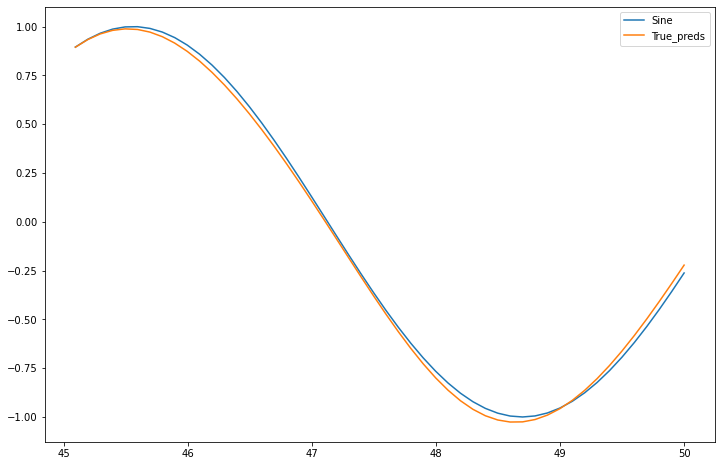

In [149]:
test.plot(figsize=(12,8))

# adding early stopping and  validation generator 

# EarlyStopping() has a few options and by default:
# •	monitor='val_loss': to use validation loss as performance measure to terminate the training.
# •	patience=0: is the number of epochs with no improvement. The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.


In [150]:
from tensorflow.keras.callbacks import EarlyStopping

In [151]:
early_stop=EarlyStopping(monitor="val_loss", patience =2 )

In [152]:
length =49
generator = TimeseriesGenerator(scaled_train , scaled_train , length =length ,  batch_size=1)

In [153]:
validation_generator= TimeseriesGenerator(scaled_test, scaled_test  ,  length = length ,  batch_size =1 )

In [154]:
len(scaled_test)

50

In [155]:
early_stop

# test LSTM

In [156]:
# define model 
model = Sequential()
# simple rnn layer 
model.add(LSTM(50,input_shape=(length , n_features)))


# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [157]:
model.fit_generator(generator  , epochs=20 , validation_data = validation_generator , callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 401 steps, validate for 1 steps
Epoch 1/20
401/401 [==============================] - 4s 10ms/step - loss: 0.0251 - val_loss: 2.1937e-05
Epoch 2/20
401/401 [==============================] - 3s 7ms/step - loss: 1.4567e-04 - val_loss: 1.0855e-04
Epoch 3/20
401/401 [==============================] - 3s 7ms/step - loss: 1.1464e-04 - val_loss: 5.3576e-06
Epoch 4/20
401/401 [==============================] - 3s 6ms/step - loss: 1.3815e-04 - val_loss: 3.4566e-05
Epoch 5/20
401/401 [==============================] - 3s 6ms/step - loss: 2.0388e-04 - val_loss: 5.8079e-06


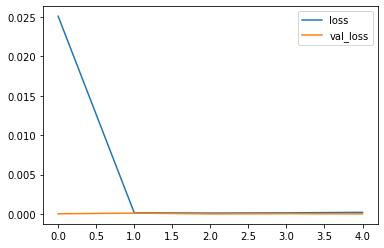

In [158]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [159]:
#current_batch

In [160]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [161]:
true_predictions = scaler.inverse_transform(test_predictions)

In [162]:
test['LSTM_True_preds']=true_predictions

C:\Anacon\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


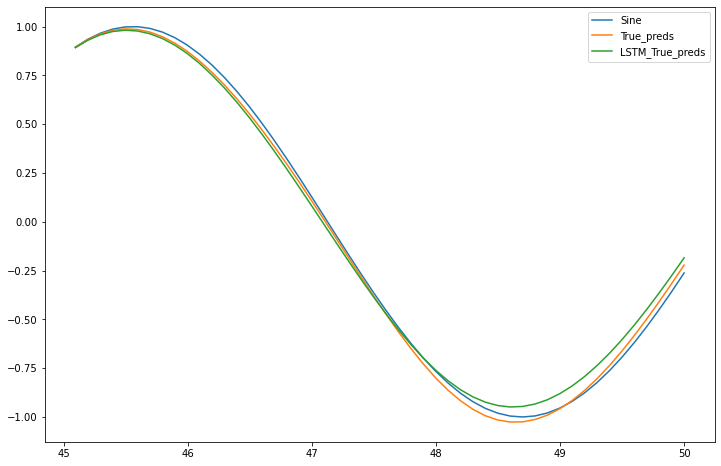

In [163]:
test.plot(figsize=(12,8))

# Forecasting 

# Forecast into unknown range. We should first utilize all our data, since we are now forecasting! 

In [164]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [165]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [166]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

  ...
    to  
  ['...']
Train for 450 steps
Epoch 1/6
450/450 [==============================] - 4s 10ms/step - loss: 0.0213
Epoch 2/6
450/450 [==============================] - 3s 7ms/step - loss: 5.1322e-04
Epoch 3/6
450/450 [==============================] - 3s 6ms/step - loss: 1.3447e-04
Epoch 4/6
450/450 [==============================] - 3s 6ms/step - loss: 1.5668e-04
Epoch 5/6
450/450 [==============================] - 3s 7ms/step - loss: 4.5733e-04
Epoch 6/6
450/450 [==============================] - 3s 6ms/step - loss: 4.8527e-05


In [167]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [168]:
forecast = scaler.inverse_transform(forecast)

In [169]:
forecast

array([[-0.171927  ],
       [-0.0735715 ],
       [ 0.025566  ],
       [ 0.12456963],
       [ 0.22246869],
       [ 0.31825719],
       [ 0.4109102 ],
       [ 0.49940217],
       [ 0.58272724],
       [ 0.65992235],
       [ 0.73008854],
       [ 0.79241319],
       [ 0.84618607],
       [ 0.89081387],
       [ 0.92583099],
       [ 0.95090054],
       [ 0.96581665],
       [ 0.97049849],
       [ 0.96498554],
       [ 0.94942476],
       [ 0.92406327],
       [ 0.88923701],
       [ 0.84535889],
       [ 0.79291184],
       [ 0.73244145],
       [ 0.66454757],
       [ 0.58988263],
       [ 0.50914673],
       [ 0.42308598],
       [ 0.33249132],
       [ 0.23819492],
       [ 0.14106821],
       [ 0.04201809],
       [-0.0580202 ],
       [-0.15808703],
       [-0.25720802],
       [-0.35439804],
       [-0.44867065],
       [-0.53904174],
       [-0.62453754],
       [-0.70420171],
       [-0.77710789],
       [-0.84237609],
       [-0.89919507],
       [-0.94684878],
       [-0

In [170]:
df

,Sine
0.000000,0.000000
0.100200,0.100033
0.200401,0.199062
0.300601,0.296095
0.400802,0.390157
...,...
49.599198,-0.618069
49.699399,-0.536331
49.799599,-0.449212
49.899800,-0.357587


In [171]:
len(forecast)

50

In [172]:
50*0.1

5.0

In [173]:
forecast_index = np.arange(50.1,55.1,step=0.1)

In [174]:
len(forecast_index)

50

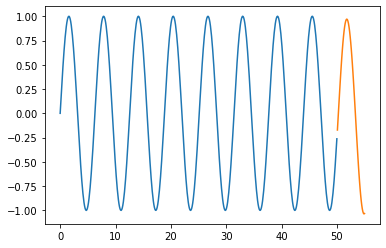

In [175]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)

# !! Great job  , 